# Steps in building a machine learning model

1. Get the Data 

2. Take a Quick Look at the Data 

3. Split the Data (Train/Validation/Test) 

4. Data Analysis (Exploratory Data Analysis or EDA) 

5. Prepare the Data for Machine Learning  

6. Select and Train a Model  

7. Evaluate the Model 

8. Fine-Tune the Model 

9. Select a final model

10. Deployment

_Step 1-5 would be done in this notebook step 6-7 will be done in the [experiment.ipynb](./experiment.ipynb) notebook step 8-9 will be done in the [tuning folder](../tuning/) step 10 would be done in the [deployment folder](../deployment/)_


1. **Get the Data**  
   - Gather the dataset from relevant sources (e.g., Kaggle, databases, APIs, etc.). The datasets was quite large and it was difficult to push it to git. So i added the dataset to _check the [data folder](../data/) for more details._  
   - Here we would just load the data using pandas. so first we have to import the necessary dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [33]:
data_list = ["../data/INCART_Arrhythmia.csv", "../data/MIT-BIH Arrhythmia Database.csv", "../data/MIT-BIH Supraventricular Arrhythmia Database.csv", "../data/Sudden Cardiac Death Holter Database.csv"]

In [35]:
dataframes = []

for data in data_list:
    doc = pd.read_csv(data)
    dataframes.append(doc)

df = pd.concat(dataframes)

/tmp/ipykernel_1876/17670846.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  doc = pd.read_csv(data)


In [59]:
df.reset_index(drop=True)

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163.0,165.0,0.069610,-0.083281,0.614133,-0.392761,0.047159,15.0,...,-0.023370,14.0,3.0,23.0,6.0,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165.0,166.0,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3.0,...,0.081637,15.0,5.0,27.0,7.0,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166.0,102.0,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6.0,...,-0.148539,33.0,13.0,52.0,6.0,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102.0,231.0,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4.0,...,0.046898,21.0,9.0,34.0,4.0,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231.0,165.0,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3.0,...,-0.112552,32.0,5.0,43.0,6.0,-0.112552,0.012989,0.091491,0.134004,0.265232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.952204,0.0,38.0,66.0,28.0,-0.952204,-0.952204,-0.952204,-0.952204,-0.952204
963650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.436390,1.0,11.0,19.0,7.0,-0.436390,-0.436390,-0.436390,-0.436390,-0.436390
963651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.055057,5.0,5.0,26.0,16.0,-0.055057,-0.198951,-0.340800,-0.455721,-0.520716
963652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.190745,3.0,6.0,15.0,6.0,-1.190745,-1.190745,-1.154962,-1.154962,-1.016100


2. **Take a Quick Look at the Data**  
   - Perform initial exploration of the dataset (e.g., inspect the data types, check for missing values, and view a few records).
   - This helps to understand what you’re working with.

In [65]:
df.columns

Index(['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak',
       '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval',
       '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1',
       '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR',
       '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval',
       '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0',
       '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4'],
      dtype='object')

In [62]:
df.describe()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,887437.000000,887437.000000,887437.000000,887437.000000,887437.000000,887437.000000,887437.000000,887437.000000,887437.000000,887437.000000,...,789039.000000,789039.000000,789039.000000,789039.000000,789039.000000,789039.000000,789039.000000,789039.000000,789039.000000,789039.000000
mean,201.094300,201.049294,0.058577,0.437883,0.525119,-0.374234,-0.125992,17.880220,9.840402,45.083641,...,-0.199531,8.544203,8.438393,27.730650,10.748054,-0.199531,-0.207508,-0.215008,-0.231296,-0.355406
std,79.775056,80.443487,0.189333,0.655515,0.756260,0.695192,0.276407,13.890492,9.492744,34.992659,...,0.268164,9.436344,7.356845,15.429075,7.278236,0.268164,0.282722,0.375177,0.464019,0.453124
min,1.000000,0.000000,-4.208601,-7.959463,-7.113196,-7.971319,-7.113196,0.000000,1.000000,2.000000,...,-6.461754,0.000000,1.000000,2.000000,1.000000,-6.461754,-4.913302,-4.398122,-4.069726,-4.520327
25%,140.000000,140.000000,-0.027840,-0.020446,-0.027729,-0.693602,-0.141656,7.000000,4.000000,21.000000,...,-0.269391,3.000000,3.000000,17.000000,5.000000,-0.269391,-0.300009,-0.386094,-0.472987,-0.556982
50%,202.000000,202.000000,0.024179,0.220681,0.423092,-0.360031,-0.074250,16.000000,7.000000,35.000000,...,-0.125534,5.000000,6.000000,25.000000,9.000000,-0.125534,-0.151693,-0.207515,-0.256271,-0.334001
75%,258.000000,258.000000,0.099947,0.953379,0.962938,-0.030444,-0.029061,26.000000,14.000000,51.000000,...,-0.032858,11.000000,12.000000,36.000000,16.000000,-0.032858,-0.022591,0.013135,0.042909,-0.070333
max,2228.000000,10964.000000,10.565904,4.738824,4.598265,4.018918,3.129033,232.000000,150.000000,334.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,4.040094,3.755566,3.575504


3. **Split the Data (Train/Validation/Test)**  
   - Split the data into training, validation, and test sets to evaluate the model’s performance.
   - A typical split might be 70% training, 15% validation, and 15% testing, though it can vary.

In [71]:
y = df.type.values
X = df.drop(columns='type')

In [75]:
X_full_train, X_test , y_full_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, random_state=42, test_size=0.25)

In [77]:
X_full_train.shape, X_train.shape, X_val.shape, X_test.shape

((770923, 33), (578192, 33), (192731, 33), (192731, 33))

4. **Data Analysis (Exploratory Data Analysis or EDA)**  
   - Use statistical and visualization techniques to understand the data better.
   - This includes checking distributions, correlations, and trends, as well as identifying outliers.

In [83]:
df.isnull().sum() / len(df)

record            0.079092
type              0.079092
0_pre-RR          0.079092
0_post-RR         0.079092
0_pPeak           0.079092
0_tPeak           0.079092
0_rPeak           0.079092
0_sPeak           0.079092
0_qPeak           0.079092
0_qrs_interval    0.079092
0_pq_interval     0.079092
0_qt_interval     0.079092
0_st_interval     0.079092
0_qrs_morph0      0.079092
0_qrs_morph1      0.079092
0_qrs_morph2      0.079092
0_qrs_morph3      0.079092
0_qrs_morph4      0.079092
1_pre-RR          0.181201
1_post-RR         0.181201
1_pPeak           0.181201
1_tPeak           0.181201
1_rPeak           0.181201
1_sPeak           0.181201
1_qPeak           0.181201
1_qrs_interval    0.181201
1_pq_interval     0.181201
1_qt_interval     0.181201
1_st_interval     0.181201
1_qrs_morph0      0.181201
1_qrs_morph1      0.181201
1_qrs_morph2      0.181201
1_qrs_morph3      0.181201
1_qrs_morph4      0.181201
dtype: float64

In [84]:
df.select_dtypes(include="float64").corr()

,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,0_qt_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0_pre-RR,1.000000,0.786380,-0.129601,0.066754,0.001920,0.279469,0.149038,0.294813,0.171532,0.321029,...,-0.063275,-0.002406,0.203621,0.178884,0.185226,-0.063275,-0.085935,-0.111015,-0.097827,0.040229
0_post-RR,0.786380,1.000000,-0.041573,0.124224,0.000463,0.264147,0.123698,0.329008,0.222551,0.362139,...,-0.122732,0.046698,0.296806,0.278180,0.240462,-0.122732,-0.131044,-0.122492,-0.099568,0.042593
0_pPeak,-0.129601,-0.041573,1.000000,0.124731,-0.020767,-0.107694,-0.135968,0.079319,0.466044,0.165135,...,-0.137852,0.026381,0.079148,0.081088,0.060355,-0.137852,-0.095584,-0.031765,-0.022457,-0.060893
0_tPeak,0.066754,0.124224,0.124731,1.000000,-0.354430,0.441192,-0.197980,-0.281895,0.087960,-0.153817,...,0.037538,0.136279,0.037683,0.085235,-0.036186,0.037538,0.078445,0.137461,0.180143,0.135285
0_rPeak,0.001920,0.000463,-0.020767,-0.354430,1.000000,-0.135898,0.449255,0.421467,-0.081107,0.244917,...,-0.131823,-0.051929,-0.046188,-0.093183,-0.084615,-0.131823,-0.158516,-0.204272,-0.228722,-0.253104
0_sPeak,0.279469,0.264147,-0.107694,0.441192,-0.135898,1.000000,0.308072,-0.112180,0.098813,-0.186896,...,0.118695,0.063126,0.107744,0.117727,0.061654,0.118695,0.080816,0.048959,0.035778,0.122637
0_qPeak,0.149038,0.123698,-0.135968,-0.197980,0.449255,0.308072,1.000000,0.114633,-0.131257,0.057071,...,0.070611,-0.060295,0.022509,-0.041589,-0.030787,0.070611,0.028397,-0.037831,-0.080492,-0.019017
0_qrs_interval,0.294813,0.329008,0.079319,-0.281895,0.421467,-0.112180,0.114633,1.000000,0.355730,0.808079,...,-0.211034,-0.137654,0.241486,0.127005,0.217045,-0.211034,-0.233696,-0.236724,-0.222167,-0.110037
0_pq_interval,0.171532,0.222551,0.466044,0.087960,-0.081107,0.098813,-0.131257,0.355730,1.000000,0.482554,...,-0.126728,-0.035928,0.241104,0.187505,0.211382,-0.126728,-0.150485,-0.153491,-0.141349,-0.062945
0_qt_interval,0.321029,0.362139,0.165135,-0.153817,0.244917,-0.186896,0.057071,0.808079,0.482554,1.000000,...,-0.175767,-0.196930,0.279155,0.094376,0.189144,-0.175767,-0.176262,-0.164082,-0.149349,-0.025914


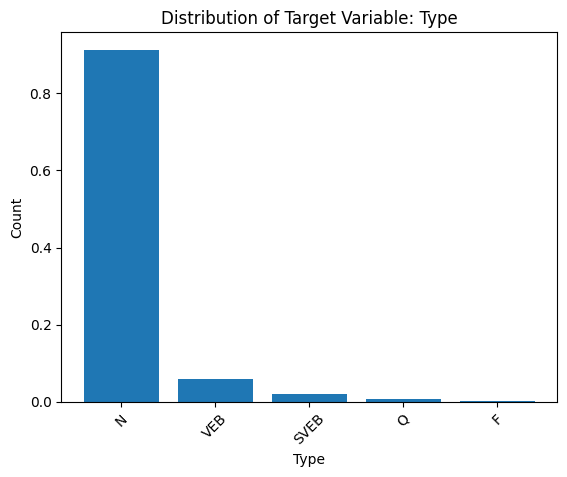

In [85]:
type_counts = df['type'].value_counts(normalize=True)

# Bar plot
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Target Variable: Type')
plt.xticks(rotation=45) 
plt.show()

In [1]:
df.dtypes

NameError: name 'df' is not defined

5. **Prepare the Data for Machine Learning**  
   - Clean the data (e.g., handling missing values, scaling, normalization, encoding categorical variables).
   - Feature engineering may also be needed (e.g., creating new features from existing ones).